In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os


In [2]:
data = pd.read_csv('Messidor 2/messidor_data.csv')

In [3]:
data

image_id  adjudicated_dr_grade  adjudicated_dme  \
0     20051020_43808_0100_PP.png                   0.0              0.0   
1     20051020_43832_0100_PP.png                   1.0              0.0   
2     20051020_43882_0100_PP.png                   1.0              0.0   
3     20051020_43906_0100_PP.png                   2.0              1.0   
4     20051020_44261_0100_PP.png                   0.0              0.0   
...                          ...                   ...              ...   
1743                IM004806.jpg                   0.0              0.0   
1744                IM004811.jpg                   1.0              0.0   
1745                IM004812.jpg                   2.0              0.0   
1746                IM004831.jpg                   0.0              0.0   
1747                IM004832.jpg                   0.0              0.0   

      adjudicated_gradable  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
1743                     1  
1744                     1  
1745                     1  
1746                     1  
1747                     1  

[1748 rows x 4 columns]

In [4]:
# Import necessary libraries
import pandas as pd
from PIL import Image
import os
import numpy as np

# Specify the path to the image folder
image_folder_path = 'Messidor 2/IMAGES/'

In [5]:
# Initialize an empty list to store the images
images = []

# Loop through the filenames in the 'image_id' column of the DataFrame
for filename in data['image_id']:
    # Create the full path to the image file by concatenating the 
    # folder path with the filename
    image_path = os.path.join(image_folder_path, filename)
    
    # Open the image using PIL
    with Image.open(image_path) as img:
        # Convert the image to a numpy array (optional, but useful for later processing)
        img_array = np.array(img)
        
        # Append the image array to the list of images
        images.append(img_array)

# Convert the list of images to a numpy array
images = np.array(images)

# Print the shape of the resulting array to check
print(images.shape)

(1748,)


/var/folders/85/plrgt1yd41n_7trcdld7xbz00000gn/T/ipykernel_4435/1315454356.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [6]:
df = data

In [7]:
df = df.dropna(subset=['adjudicated_dr_grade'])

In [8]:
df['adjudicated_dr_grade'].unique()

array([0., 1., 2., 3., 4.])

# Visualize Sample Images

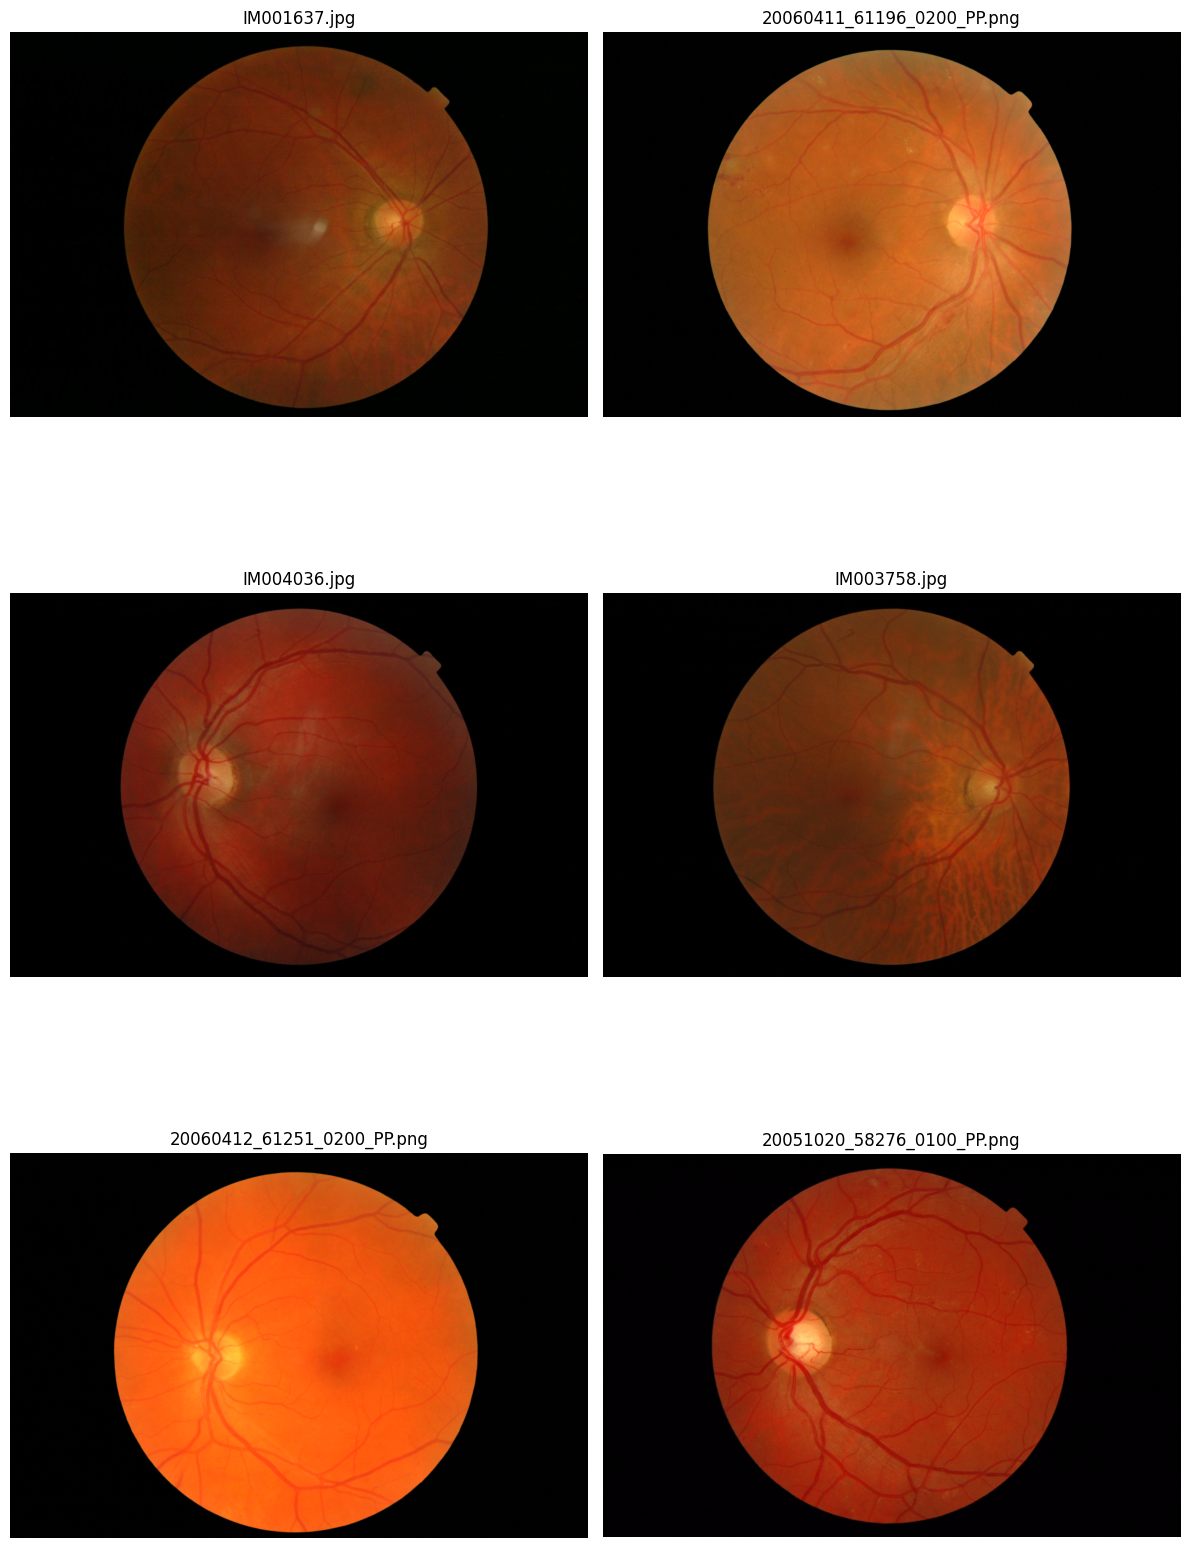

In [9]:
sample_images = df['image_id'].sample(6)

# Set up the grid
plt.figure(figsize=(12, 18))  # Width, Height - Adjust the size as per your requirement

for idx, filename in enumerate(sample_images):
    image_path = os.path.join(image_folder_path, filename)
    with Image.open(image_path) as img:
        plt.subplot(3, 2, idx+1)  # 3 rows, 2 columns, index
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
sample_image_dir = ['Messidor 2/IMAGES/20051116_44816_0400_PP.png',
'Messidor 2/IMAGES/IM001751.jpg',
'Messidor 2/IMAGES/20060412_58054_0200_PP.png',
'Messidor 2/IMAGES/IM003746.jpg',
'Messidor 2/IMAGES/20060407_44636_0200_PP.png',
'Messidor 2/IMAGES/20051021_39482_0100_PP.png']

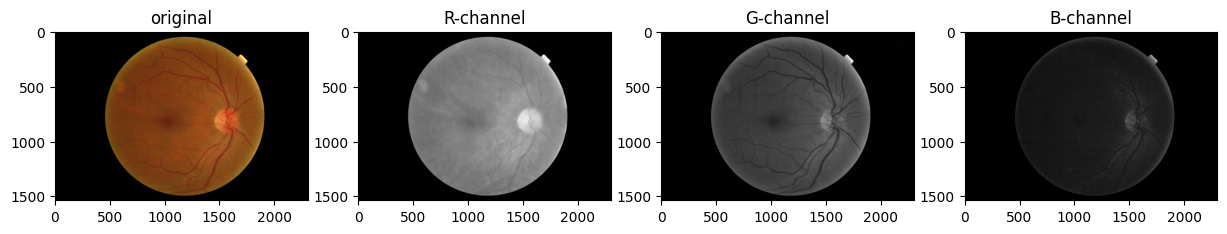

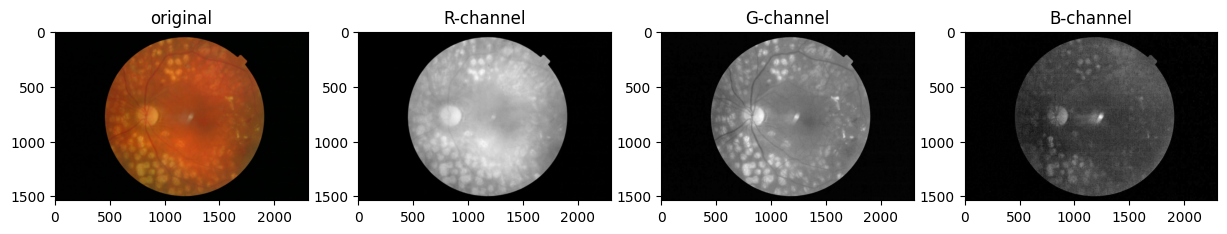

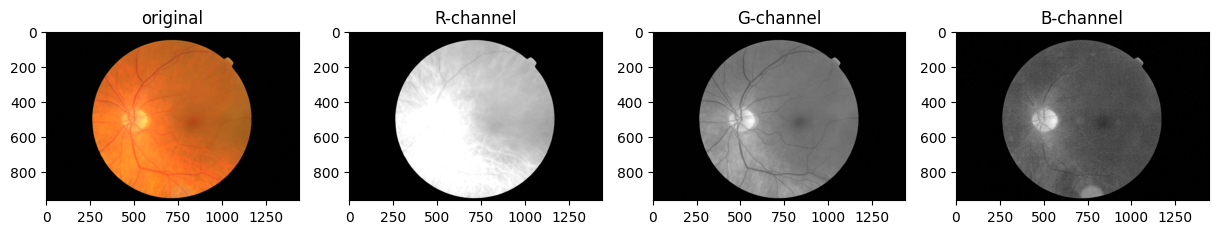

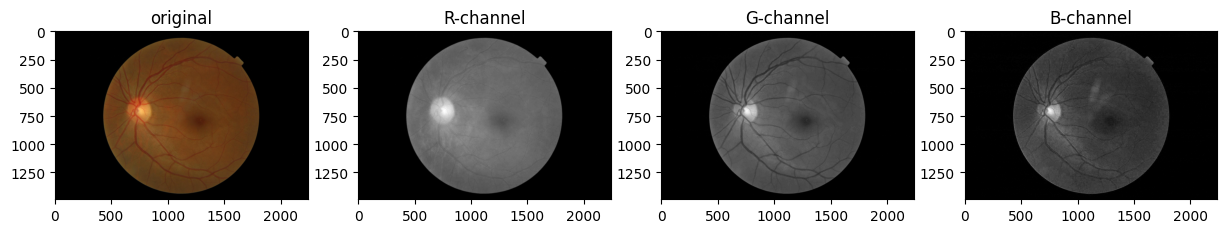

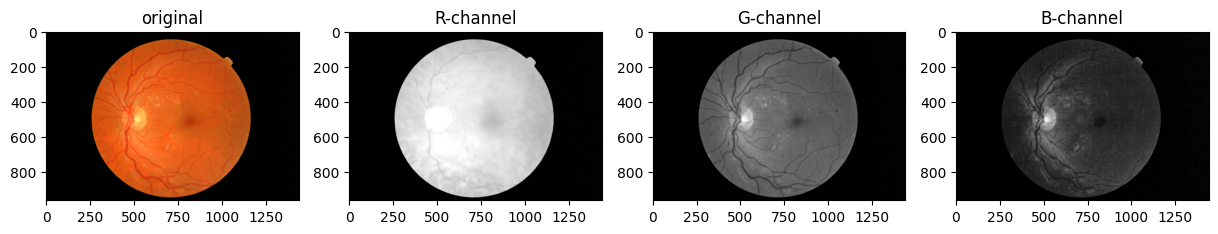

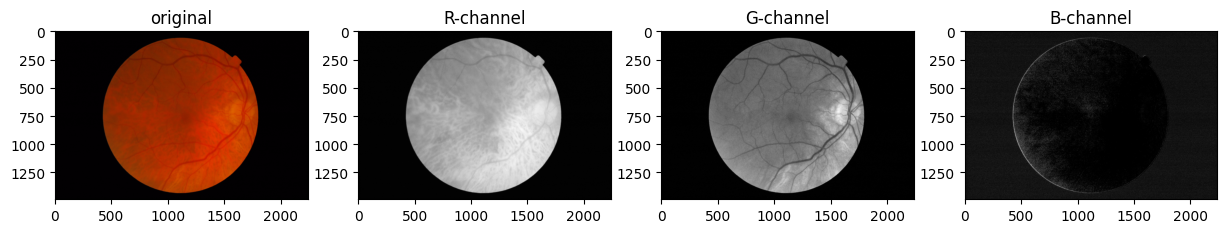

In [11]:
for image_path in sample_image_dir:
    image=plt.imread(image_path)

    plt.figure(figsize=(15,15))
    plt.subplot(141)
    plt.title("original")
    plt.imshow(image)
    plt.subplot(142)
    plt.title("R-channel")
    plt.imshow(image[:,:,0],cmap=plt.cm.gray)
    plt.subplot(143)
    plt.title("G-channel")
    plt.imshow(image[:,:,1],cmap=plt.cm.gray)
    plt.subplot(144)
    plt.title("B-channel")
    plt.imshow(image[:,:,2],cmap=plt.cm.gray)
    plt.show()

In [12]:
import cv2

In [13]:
IMG_SIZE = 1048

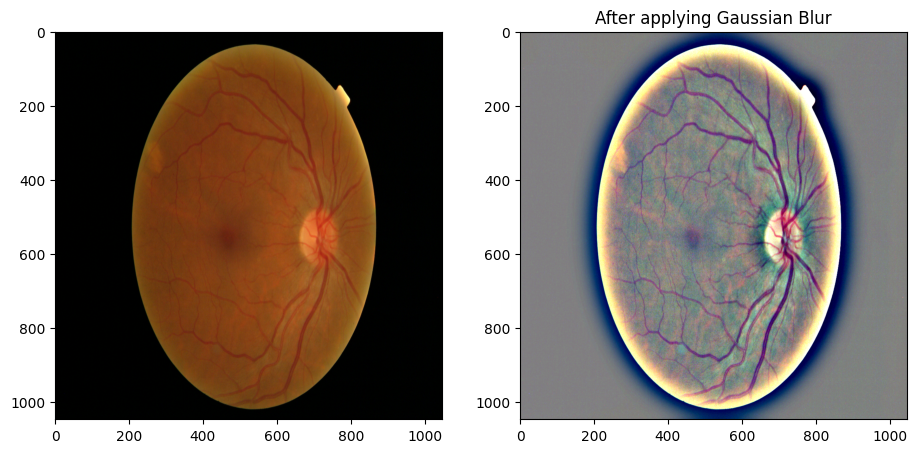

In [14]:
# rn = np.random.randint(low = 0,high = len(df_train) - 1)

img = cv2.imread('Messidor 2/IMAGES/20051116_44816_0400_PP.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

img_t = cv2.addWeighted(img,4, cv2.GaussianBlur(img , (0,0) , 30) ,-4 ,128)

f, axarr = plt.subplots(1,2,figsize = (11,11))
axarr[0].imshow(img)
axarr[1].imshow(img_t)
plt.title('After applying Gaussian Blur')
plt.show()

             Width       Height
count  1744.000000  1744.000000
mean   2020.385321  1345.045872
std     382.967629   254.244858
min    1440.000000   960.000000
25%    1440.000000   960.000000
50%    2240.000000  1488.000000
75%    2304.000000  1536.000000
max    2304.000000  1536.000000


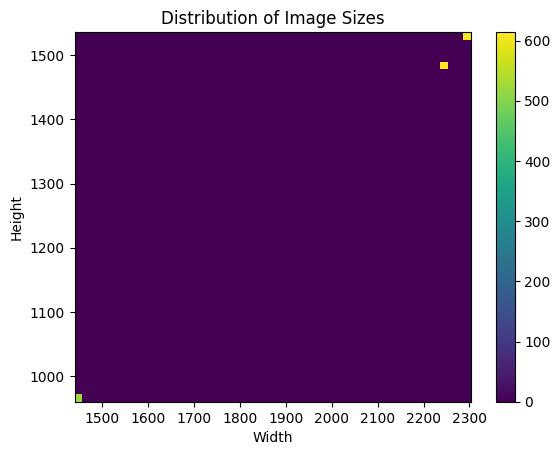

In [15]:
image_folder_path = 'Messidor 2/IMAGES/'
image_sizes = []

for filename in df['image_id']:
    image_path = os.path.join(image_folder_path, filename)
    with Image.open(image_path) as img:
        image_sizes.append(img.size)

# Convert to DataFrame for convenience
image_sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

# Display some statistics
print(image_sizes_df.describe())

# Plot image size distribution
plt.hist2d(image_sizes_df['Width'], image_sizes_df['Height'], bins=(50, 50), cmap='viridis')
plt.colorbar()
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Distribution of Image Sizes')
plt.show()


# Color Distribution:
Analyze the distribution of color intensities in the images:

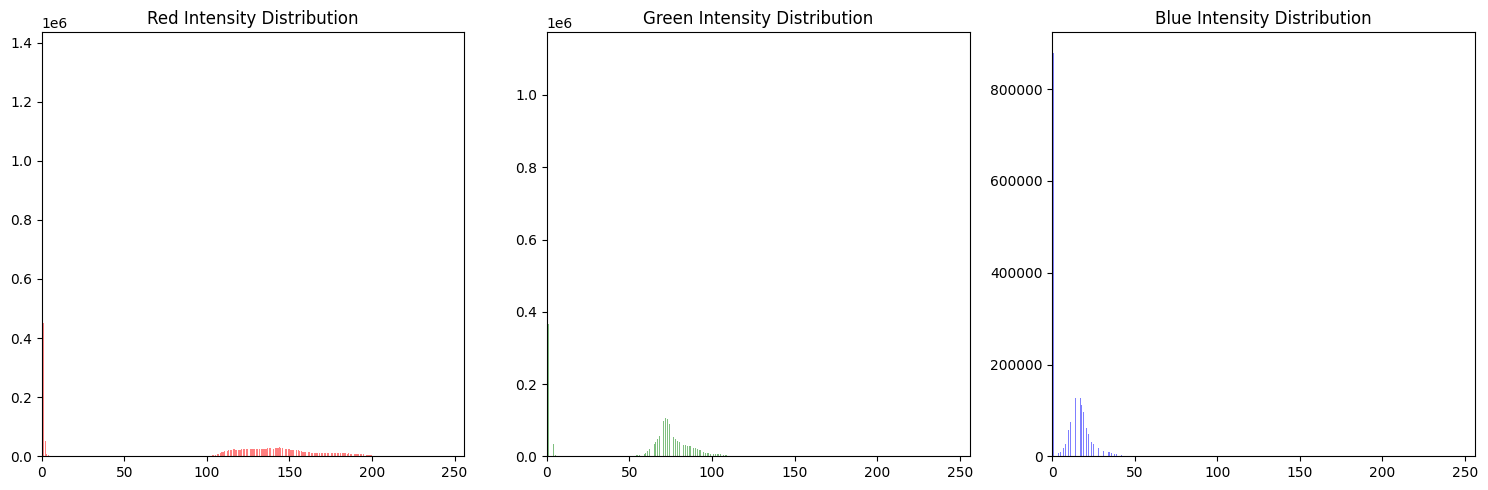

In [20]:
def plot_color_distribution(image_id):
    image_path = os.path.join(image_folder_path, image_id)
    img = Image.open(image_path)
    img_arr = np.array(img)
    plt.figure(figsize=(15,5))
    for i, color in enumerate(['red', 'green', 'blue']):
        plt.subplot(1, 3, i+1)
        plt.hist(img_arr[:,:,i].ravel(), bins=256, color=color, alpha=0.5, rwidth=0.8)
        plt.title(f'{color.capitalize()} Intensity Distribution')
        plt.xlim([0,256])
    plt.tight_layout()
    plt.show()

# Test on a sample image
sample_image_id = df['image_id'].sample(1).values[0]
plot_color_distribution(sample_image_id)


# Compare Healthy vs. Diseased Images:
It's beneficial to visually compare how a healthy retina looks 
compared to various stages of the disease. This will give you an 
idea of what features might be important.

In [21]:
# Assume you have loaded your data into a pandas DataFrame 'df'
grades = df['adjudicated_dr_grade'].unique()
n = len(grades)

In [22]:
grades, n

(array([0., 1., 2., 3., 4.]), 5)

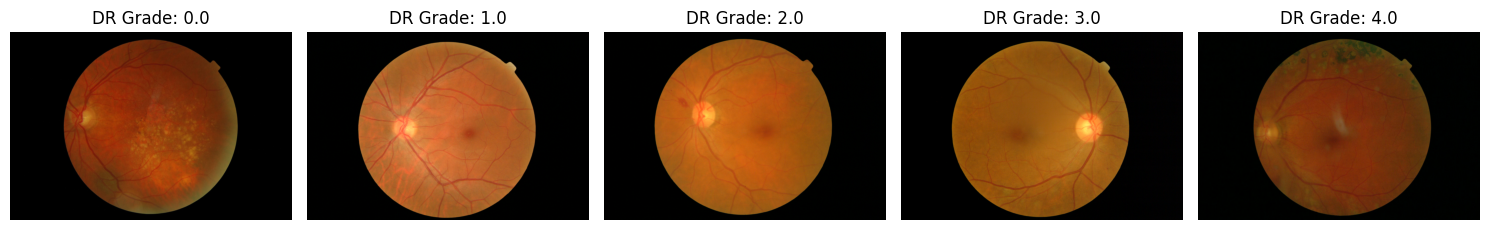

In [23]:
# Assume you have loaded your data into a pandas DataFrame 'df'
grades = df['adjudicated_dr_grade'].unique()
n = len(grades)

plt.figure(figsize=(15,5))

for i, grade in enumerate(grades):
    plt.subplot(1, n, i+1)  # 1 row, n columns, i-th subplot
    
    sample_image_id = df[df['adjudicated_dr_grade'] == grade]['image_id'].sample(1).values[0]
    image_path = os.path.join(image_folder_path, sample_image_id)
    img = Image.open(image_path)
    
    plt.imshow(img)
    plt.title(f'DR Grade: {grade}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Box Plots:
To further analyze image properties, consider using box plots to
showcase variations in image dimensions, brightness, etc.

/var/folders/85/plrgt1yd41n_7trcdld7xbz00000gn/T/ipykernel_3832/2347328828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brightness'] = image_brightness


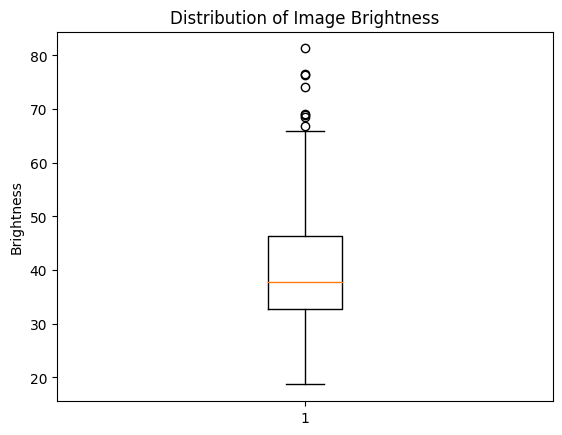

In [24]:
image_brightness = [np.mean(np.array(Image.open(os.path.join(image_folder_path, img_id)))) for img_id in df['image_id']]
df['brightness'] = image_brightness

plt.boxplot(df['brightness'])
plt.title('Distribution of Image Brightness')
plt.ylabel('Brightness')
plt.show()


# Correlation Analysis:
Analyze if there's any correlation between image properties 
(like brightness) and their labels.

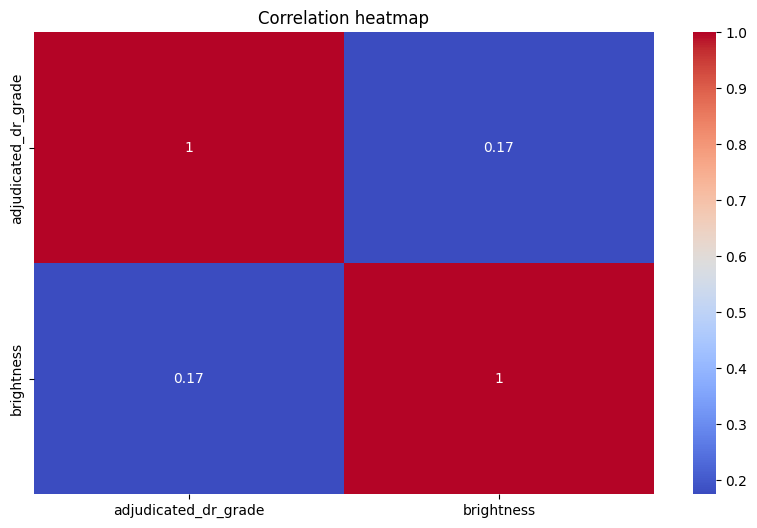

In [25]:
correlation = df[['adjudicated_dr_grade', 'brightness']].corr()
plt.figure(figsize=(10,6))
plt.title('Correlation heatmap')
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


# Texture Analysis using GLCM:
GLCM is a matrix that measures the frequency of different pairs of pixels with a specific brightness value at a certain distance and direction in an image. From GLCM, you can derive several texture features, such as contrast, dissimilarity, homogeneity, ASM (Angular Second Moment), energy, and correlation.

Let's visualize these properties for some sample images:

In [26]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from skimage.feature import greycomatrix, greycoprops
from skimage.color import rgb2gray
from scipy.fftpack import fftshift, fft2


# Frequency Analysis using Fourier Transform:
Frequency analysis in images is analogous to the frequency analysis in signals. The Fourier Transform is a tool that breaks a waveform (a function or signal) into an alternate representation, characterized by sine and cosines. In the context of images, it helps to identify various frequency components.

Let's see how we can visualize the frequency components of an image:

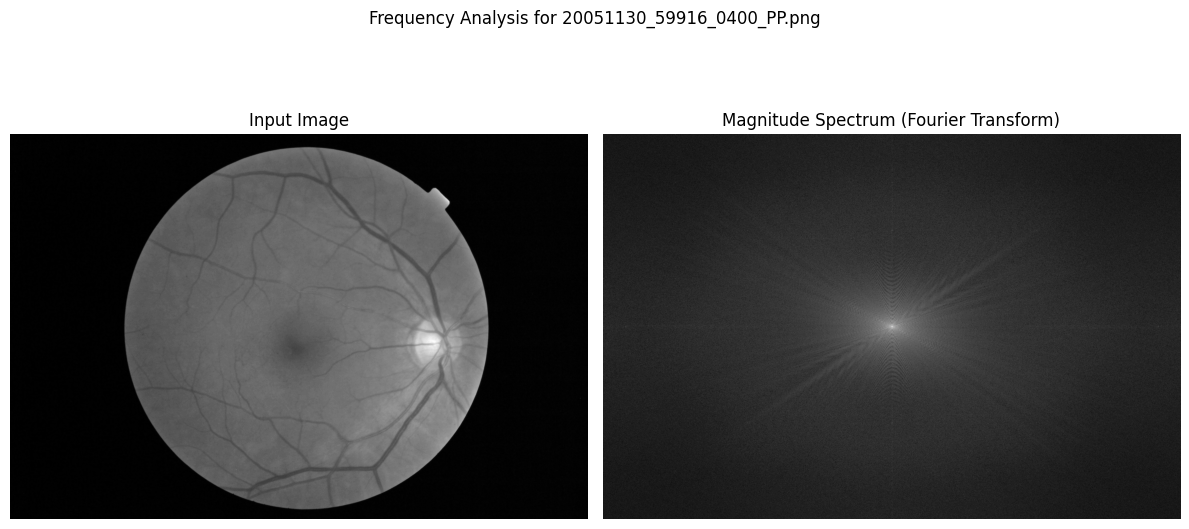

In [27]:
# Function to perform frequency analysis
def frequency_analysis(image_id):
    image_path = os.path.join(image_folder_path, image_id)
    img = Image.open(image_path)
    img_gray = rgb2gray(np.array(img))
    
    # Perform 2D Fast Fourier Transform
    f_transform = fft2(img_gray)
    f_transform_shifted = fftshift(f_transform)
    
    # Compute magnitude spectrum
    magnitude_spectrum = np.abs(f_transform_shifted)
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Frequency Analysis for {image_id}')
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
    plt.title('Magnitude Spectrum (Fourier Transform)')
    plt.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Test on a sample image
sample_image_id = df['image_id'].sample(1).values[0]
frequency_analysis(sample_image_id)


In [ ]:
Gaussian BLur

In [39]:
'''
This Function performs image processing on top of images by performing Gaussian Blur and Circle Crop
'''

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img
    
    
def circle_crop(img, sigmaX):   
    """
    Create circular crop around image centre    
    """    
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img

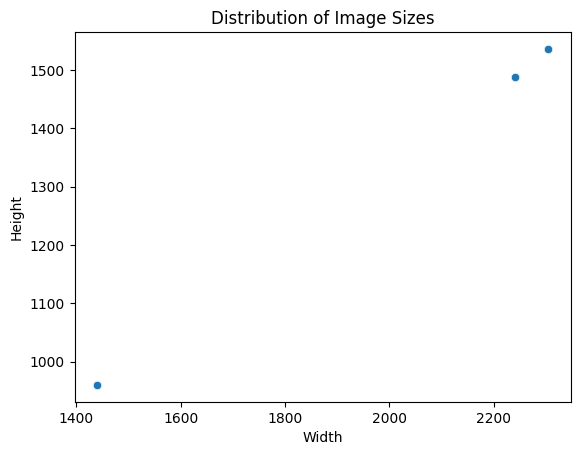

In [28]:
image_widths = []
image_heights = []

for filename in df['image_id']:
    image_path = os.path.join(image_folder_path, filename)
    with Image.open(image_path) as img:
        width, height = img.size
        image_widths.append(width)
        image_heights.append(height)

sns.scatterplot(x=image_widths, y=image_heights)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Distribution of Image Sizes')
plt.show()

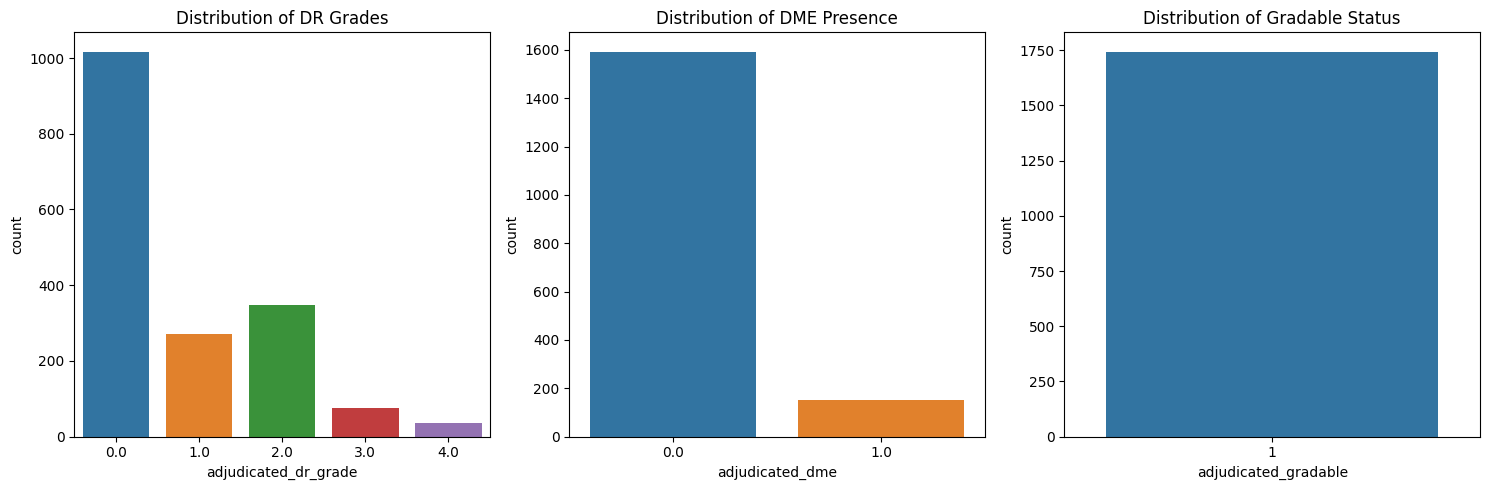

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(data=df, x='adjudicated_dr_grade', ax=axes[0])
axes[0].set_title('Distribution of DR Grades')

sns.countplot(data=df, x='adjudicated_dme', ax=axes[1])
axes[1].set_title('Distribution of DME Presence')

sns.countplot(data=df, x='adjudicated_gradable', ax=axes[2])
axes[2].set_title('Distribution of Gradable Status')

plt.tight_layout()
plt.show()


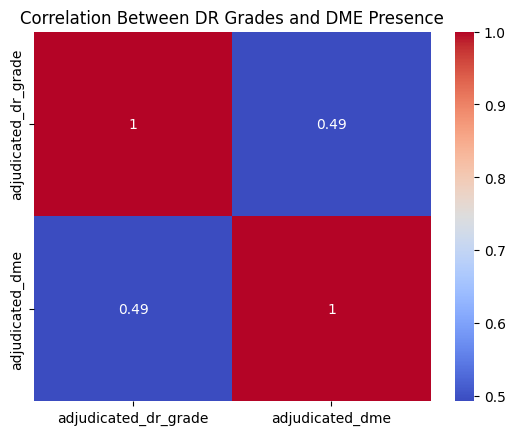

In [30]:
correlation = df[['adjudicated_dr_grade', 'adjudicated_dme']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between DR Grades and DME Presence')
plt.show()

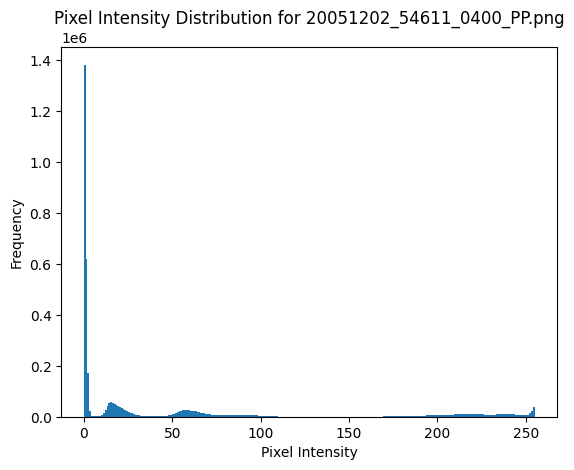

In [31]:
filename = df['image_id'].sample(1).iloc[0]
image_path = os.path.join(image_folder_path, filename)
with Image.open(image_path) as img:
    img_array = np.array(img)
    plt.hist(img_array.ravel(), bins=256)
    plt.title(f'Pixel Intensity Distribution for {filename}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

In [32]:
missing_data = df.isnull().sum()
print(missing_data)


image_id                0
adjudicated_dr_grade    0
adjudicated_dme         0
adjudicated_gradable    0
brightness              0
dtype: int64


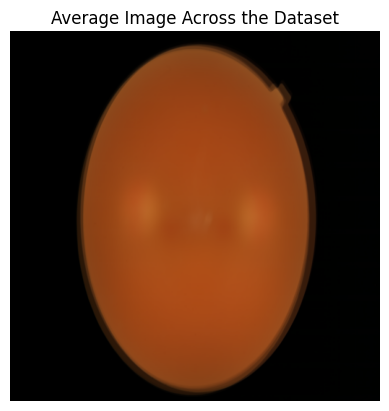

In [33]:
# Choose a common size to which all images will be resized
common_size = (512, 512)

# Initialize an array with zeros, having the shape of the common size and 3 color channels
sum_image = np.zeros((common_size[0], common_size[1], 3))

# Sum up all images
for filename in df['image_id']:
    image_path = os.path.join(image_folder_path, filename)
    with Image.open(image_path) as img:
        # Resize the image to the common size
        img_resized = img.resize(common_size)
        sum_image += np.array(img_resized)

# Calculate the average
avg_image = sum_image / len(df)

# Display the average image
plt.imshow(avg_image.astype('uint8'))  # Cast to uint8 to display the image correctly
plt.title('Average Image Across the Dataset')
plt.axis('off')
plt.show()

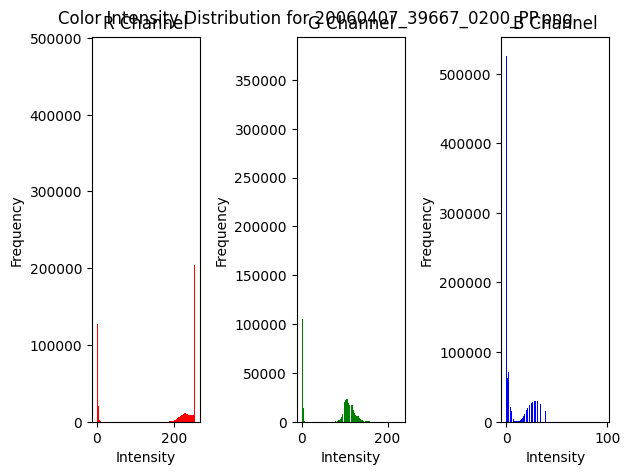

In [34]:
# Example for one randomly selected image
filename = df['image_id'].sample(1).iloc[0]
image_path = os.path.join(image_folder_path, filename)
with Image.open(image_path) as img:
    img_array = np.array(img)
    color_channels = ('r', 'g', 'b')

    for i, color in enumerate(color_channels):
        plt.subplot(1, 3, i+1)
        plt.hist(img_array[:, :, i].ravel(), bins=256, color=color)
        plt.title(f'{color.upper()} Channel')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.suptitle(f'Color Intensity Distribution for {filename}')
    plt.show()

In [35]:
df

image_id  adjudicated_dr_grade  adjudicated_dme  \
0     20051020_43808_0100_PP.png                   0.0              0.0   
1     20051020_43832_0100_PP.png                   1.0              0.0   
2     20051020_43882_0100_PP.png                   1.0              0.0   
3     20051020_43906_0100_PP.png                   2.0              1.0   
4     20051020_44261_0100_PP.png                   0.0              0.0   
...                          ...                   ...              ...   
1743                IM004806.jpg                   0.0              0.0   
1744                IM004811.jpg                   1.0              0.0   
1745                IM004812.jpg                   2.0              0.0   
1746                IM004831.jpg                   0.0              0.0   
1747                IM004832.jpg                   0.0              0.0   

      adjudicated_gradable  brightness  
0                        1   27.173277  
1                        1   27.391708  
2                        1   52.049759  
3                        1   52.450599  
4                        1   31.635957  
...                    ...         ...  
1743                     1   23.534976  
1744                     1   28.646153  
1745                     1   30.903705  
1746                     1   36.053604  
1747                     1   21.244894  

[1744 rows x 5 columns]

# Contrast-Limited Adaptive Histogram Equalisation (CLAHE) 

In [34]:
import cv2
import os
import numpy as np
import pandas as pd

# Sample dataset file path
image_folder_path = 'Messidor 2/IMAGES/'

# Output folder
output_folder_path = 'CLAHE_Images'

if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Create a new column for the processed image filenames
df['clahe_image_filename'] = None

for index, row in df.iterrows():
    # Read image
    image_path = os.path.join(image_folder_path, row['image_id'])
    img = cv2.imread(image_path, 0)  # Read in grayscale
    
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    
    # Save the processed image as a new file
    output_filename = os.path.join(output_folder_path, 'CLAHE_' + row['image_id'])
    cv2.imwrite(output_filename, cl1)
    
    # Save the new filename to the DataFrame
    df.at[index, 'clahe_image_filename'] = output_filename

# Now, df['clahe_image_filename'] contains the filenames of the processed images
df.head()


/var/folders/85/plrgt1yd41n_7trcdld7xbz00000gn/T/ipykernel_10835/3406943492.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clahe_image_filename'] = None


                     image_id  adjudicated_dr_grade  adjudicated_dme  \
0  20051020_43808_0100_PP.png                   0.0              0.0   
1  20051020_43832_0100_PP.png                   1.0              0.0   
2  20051020_43882_0100_PP.png                   1.0              0.0   
3  20051020_43906_0100_PP.png                   2.0              1.0   
4  20051020_44261_0100_PP.png                   0.0              0.0   

   adjudicated_gradable  brightness  \
0                     1   27.173277   
1                     1   27.391708   
2                     1   52.049759   
3                     1   52.450599   
4                     1   31.635957   

                            clahe_image_filename  
0  CLAHE_Images/CLAHE_20051020_43808_0100_PP.png  
1  CLAHE_Images/CLAHE_20051020_43832_0100_PP.png  
2  CLAHE_Images/CLAHE_20051020_43882_0100_PP.png  
3  CLAHE_Images/CLAHE_20051020_43906_0100_PP.png  
4  CLAHE_Images/CLAHE_20051020_44261_0100_PP.png  


In [35]:
df

image_id  adjudicated_dr_grade  adjudicated_dme  \
0     20051020_43808_0100_PP.png                   0.0              0.0   
1     20051020_43832_0100_PP.png                   1.0              0.0   
2     20051020_43882_0100_PP.png                   1.0              0.0   
3     20051020_43906_0100_PP.png                   2.0              1.0   
4     20051020_44261_0100_PP.png                   0.0              0.0   
...                          ...                   ...              ...   
1743                IM004806.jpg                   0.0              0.0   
1744                IM004811.jpg                   1.0              0.0   
1745                IM004812.jpg                   2.0              0.0   
1746                IM004831.jpg                   0.0              0.0   
1747                IM004832.jpg                   0.0              0.0   

      adjudicated_gradable  brightness  \
0                        1   27.173277   
1                        1   27.391708   
2                        1   52.049759   
3                        1   52.450599   
4                        1   31.635957   
...                    ...         ...   
1743                     1   23.534976   
1744                     1   28.646153   
1745                     1   30.903705   
1746                     1   36.053604   
1747                     1   21.244894   

                               clahe_image_filename  
0     CLAHE_Images/CLAHE_20051020_43808_0100_PP.png  
1     CLAHE_Images/CLAHE_20051020_43832_0100_PP.png  
2     CLAHE_Images/CLAHE_20051020_43882_0100_PP.png  
3     CLAHE_Images/CLAHE_20051020_43906_0100_PP.png  
4     CLAHE_Images/CLAHE_20051020_44261_0100_PP.png  
...                                             ...  
1743                CLAHE_Images/CLAHE_IM004806.jpg  
1744                CLAHE_Images/CLAHE_IM004811.jpg  
1745                CLAHE_Images/CLAHE_IM004812.jpg  
1746                CLAHE_Images/CLAHE_IM004831.jpg  
1747                CLAHE_Images/CLAHE_IM004832.jpg  

[1744 rows x 6 columns]

In [46]:
# Read an image
img = cv2.imread('CLAHE_Images/CLAHE_IM004806.jpg')

# Retrieve the dimensions
height, width, _ = img.shape
print(f'The size of the image is: width: {width}px, height: {height}px')

The size of the image is: width: 2240px, height: 1488px


# Resizing all images to 2240x1488

In [36]:
import cv2
import os
import pandas as pd

# Your data
# Sample dataset file path
output_folder_path = 'Resized_Images_512'

# Create output folder if it does not exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Resize all images to 2240x1488
new_size = (512, 512)

# Iterate over the image filenames in your DataFrame
for index, row in df.iterrows():
    image_path = os.path.join(image_folder_path, row['image_id'])
    
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, new_size)
    
    # Save the resized image to the new folder
    output_filename = os.path.join(output_folder_path, row['image_id'])
    cv2.imwrite(output_filename, resized_img)

print("All images have been resized.")

All images have been resized.


# Image Normalization

In [9]:
normalized_images = []

for index, row in df.iterrows():
    # Load image
    image_path = os.path.join('Resized_Images_512', row['image_id'])
    with Image.open(image_path) as img:
        
        # Convert to numpy array
        img_array = np.array(img)
        
        # Perform Min-Max normalization
        normalized_img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))
        
        # Append normalized image array to list
        normalized_images.append(normalized_img_array)

# Convert the list of normalized images to a numpy array
normalized_images = np.array(normalized_images)

Min: 0.0
Max: 1.0


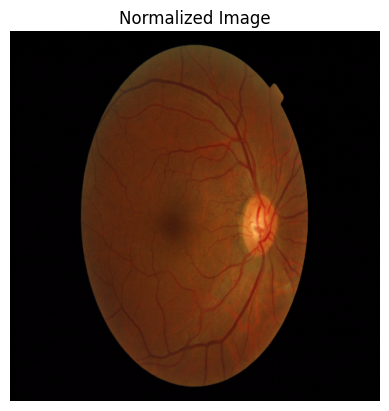

In [38]:
# Example: Check the min and max of the first normalized image
print("Min:", np.min(normalized_images[0]))
print("Max:", np.max(normalized_images[0]))

# Visualize the first normalized image
plt.imshow(normalized_images[0], cmap='gray')
plt.title('Normalized Image')
plt.axis('off')
plt.show()

# Train and Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Convert list of arrays to a numpy array
images = normalized_images
labels = df['adjudicated_dr_grade'].values

In [12]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# AUGMENTATION

In [13]:
import tensorflow as tf

In [14]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,      # Range (degrees) within which to randomly rotate pictures
    width_shift_range=0.2,  # Fraction of total width to randomly translate images
    height_shift_range=0.2, # Fraction of total height to randomly translate images
    shear_range=0.2,        # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest',    # Points outside the boundaries of the input are filled according to the given mode
)

In [15]:
# Fits the model on batches with real-time data augmentation:
train_generator = datagen.flow(train_images, train_labels, batch_size=32)

In [16]:
# Fits the model on batches with real-time data augmentation:
test_generator = datagen.flow(test_images, test_labels, batch_size=32)

In [17]:
len(train_generator)

44

In [18]:
len(test_generator)

11

# Displaying Augmented Image

In [19]:
# Select one image to augment
image = train_images[0]
image = image.reshape((1,) + image.shape)  # Reshape the image

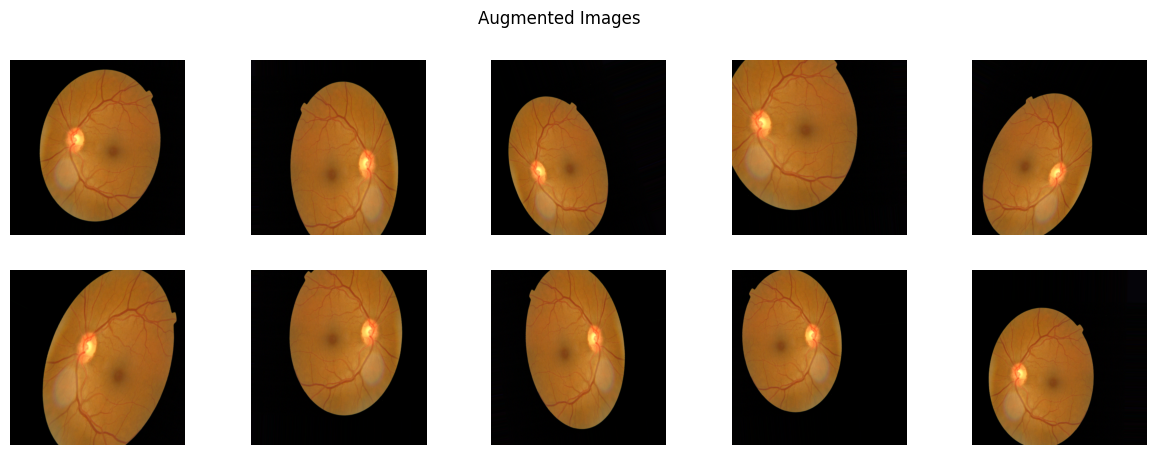

In [20]:
# The .flow() command generates batches of randomly transformed images
# It will loop indefinitely, so we need to break the loop at some point
num_augmented_images_to_show = 10
plt.figure(figsize=(15, 5))

for i, batch in enumerate(datagen.flow(image, batch_size=1)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(batch[0])
    plt.axis('off')
    
    if i == num_augmented_images_to_show - 1:
        break

plt.suptitle('Augmented Images')
plt.show()

# MODELLING

In [21]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3

base_model1 = VGG16(weights='imagenet', include_top=False)
base_model2 = ResNet50(weights='imagenet', include_top=False)
base_model3 = InceptionV3(weights='imagenet', include_top=False)


In [22]:
for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model2.layers:
    layer.trainable = False
for layer in base_model3.layers:
    layer.trainable = False

In [23]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [24]:
def build_gap_model(base_model):
    gap_layer = GlobalAveragePooling2D()(base_model.output)
    gap_model = Model(inputs=base_model.input, outputs=gap_layer)
    return gap_model

In [25]:
gap_model1 = build_gap_model(base_model1)
gap_model2 = build_gap_model(base_model2)
gap_model3 = build_gap_model(base_model3)

In [29]:
from tqdm import tqdm

In [30]:
def extract_features(generator, model1, model2, model3):
    features1, features2, features3, labels = [], [], [], []
    
    # Number of steps to loop over generator
    steps = len(generator)
    
    for i in tqdm(range(steps)):
        batch_data, batch_labels = next(generator)
        features1.append(model1.predict(batch_data))
        features2.append(model2.predict(batch_data))
        features3.append(model3.predict(batch_data))
        labels.append(batch_labels)
        
    features1 = np.concatenate(features1, axis=0)
    features2 = np.concatenate(features2, axis=0)
    features3 = np.concatenate(features3, axis=0)
    labels = np.concatenate(labels, axis=0)
    
    return features1, features2, features3, labels


In [31]:
features1_train, features2_train, features3_train, train_labels_augmented = extract_features(
    train_generator, gap_model1, gap_model2, gap_model3 )

  0%|                                                    | 0/44 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


  2%|█                                           | 1/44 [00:24<17:14, 24.05s/it]

1/1 [==============================] - 3s 3s/step


  5%|██                                          | 2/44 [00:47<16:33, 23.65s/it]

1/1 [==============================] - 3s 3s/step


  7%|███                                         | 3/44 [01:12<16:37, 24.33s/it]

1/1 [==============================] - 3s 3s/step


  9%|████                                        | 4/44 [01:35<15:56, 23.90s/it]

1/1 [==============================] - 3s 3s/step


 11%|█████                                       | 5/44 [01:58<15:17, 23.54s/it]

1/1 [==============================] - 3s 3s/step


 14%|██████                                      | 6/44 [02:21<14:43, 23.24s/it]

1/1 [==============================] - 3s 3s/step


 16%|███████                                     | 7/44 [02:44<14:14, 23.09s/it]

1/1 [==============================] - 3s 3s/step


 18%|████████                                    | 8/44 [03:06<13:41, 22.83s/it]

1/1 [==============================] - 3s 3s/step


 20%|█████████                                   | 9/44 [03:28<13:16, 22.75s/it]

1/1 [==============================] - 3s 3s/step


 23%|█████████▊                                 | 10/44 [03:50<12:41, 22.41s/it]

1/1 [==============================] - 3s 3s/step


 25%|██████████▊                                | 11/44 [04:12<12:17, 22.36s/it]

1/1 [==============================] - 3s 3s/step


 27%|███████████▋                               | 12/44 [04:34<11:48, 22.15s/it]

1/1 [==============================] - 3s 3s/step


 30%|████████████▋                              | 13/44 [04:56<11:28, 22.20s/it]

1/1 [==============================] - 3s 3s/step


 32%|█████████████▋                             | 14/44 [05:19<11:12, 22.42s/it]

1/1 [==============================] - 3s 3s/step


 34%|██████████████▋                            | 15/44 [05:42<10:51, 22.47s/it]

1/1 [==============================] - 3s 3s/step


 36%|███████████████▋                           | 16/44 [06:04<10:27, 22.39s/it]

1/1 [==============================] - 3s 3s/step


 39%|████████████████▌                          | 17/44 [06:26<10:01, 22.26s/it]

1/1 [==============================] - 3s 3s/step


 41%|█████████████████▌                         | 18/44 [06:49<09:40, 22.35s/it]

1/1 [==============================] - 3s 3s/step


 43%|██████████████████▌                        | 19/44 [07:11<09:20, 22.42s/it]

1/1 [==============================] - 3s 3s/step


 45%|███████████████████▌                       | 20/44 [07:34<09:01, 22.56s/it]

1/1 [==============================] - 3s 3s/step


 48%|████████████████████▌                      | 21/44 [07:57<08:41, 22.65s/it]

1/1 [==============================] - 3s 3s/step


 50%|█████████████████████▌                     | 22/44 [08:19<08:16, 22.55s/it]

1/1 [==============================] - 3s 3s/step


 52%|██████████████████████▍                    | 23/44 [08:42<07:51, 22.47s/it]

1/1 [==============================] - 3s 3s/step


 55%|███████████████████████▍                   | 24/44 [09:03<07:24, 22.22s/it]

1/1 [==============================] - 3s 3s/step


 57%|████████████████████████▍                  | 25/44 [09:25<07:02, 22.25s/it]

1/1 [==============================] - 3s 3s/step


 59%|█████████████████████████▍                 | 26/44 [09:48<06:39, 22.19s/it]

1/1 [==============================] - 3s 3s/step


 61%|██████████████████████████▍                | 27/44 [10:10<06:17, 22.23s/it]

1/1 [==============================] - 3s 3s/step


 64%|███████████████████████████▎               | 28/44 [10:31<05:52, 22.04s/it]

1/1 [==============================] - 3s 3s/step


 66%|████████████████████████████▎              | 29/44 [10:54<05:32, 22.14s/it]

1/1 [==============================] - 3s 3s/step


 68%|█████████████████████████████▎             | 30/44 [11:16<05:11, 22.27s/it]

1/1 [==============================] - 3s 3s/step


 70%|██████████████████████████████▎            | 31/44 [11:39<04:50, 22.31s/it]

1/1 [==============================] - 3s 3s/step


 73%|███████████████████████████████▎           | 32/44 [12:00<04:25, 22.11s/it]

1/1 [==============================] - 3s 3s/step


 75%|████████████████████████████████▎          | 33/44 [12:23<04:03, 22.16s/it]

1/1 [==============================] - 3s 3s/step


 77%|█████████████████████████████████▏         | 34/44 [12:44<03:40, 22.02s/it]

1/1 [==============================] - 3s 3s/step


 80%|██████████████████████████████████▏        | 35/44 [13:07<03:19, 22.13s/it]

1/1 [==============================] - 3s 3s/step


 82%|███████████████████████████████████▏       | 36/44 [13:28<02:55, 21.99s/it]

1/1 [==============================] - 3s 3s/step


 84%|████████████████████████████████████▏      | 37/44 [13:51<02:34, 22.14s/it]

1/1 [==============================] - 3s 3s/step


 86%|█████████████████████████████████████▏     | 38/44 [14:13<02:12, 22.09s/it]

1/1 [==============================] - 3s 3s/step


 89%|██████████████████████████████████████     | 39/44 [14:35<01:51, 22.21s/it]

1/1 [==============================] - 3s 3s/step


 91%|███████████████████████████████████████    | 40/44 [14:58<01:29, 22.34s/it]

1/1 [==============================] - 4s 4s/step


 93%|████████████████████████████████████████   | 41/44 [15:22<01:08, 22.78s/it]

1/1 [==============================] - 3s 3s/step


 95%|█████████████████████████████████████████  | 42/44 [15:46<00:46, 23.12s/it]

1/1 [==============================] - 3s 3s/step


 98%|██████████████████████████████████████████ | 43/44 [16:09<00:23, 23.19s/it]

1/1 [==============================] - 2s 2s/step


100%|███████████████████████████████████████████| 44/44 [16:23<00:00, 22.36s/it]


In [32]:
features1_train.shape,features2_train.shape,features3_train.shape

((1395, 512), (1395, 2048), (1395, 2048))

In [33]:
features1_test, features2_test, features3_test, test_labels_augmented = extract_features(
    test_generator, gap_model1, gap_model2, gap_model3 )

  0%|                                                    | 0/11 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  9%|████                                        | 1/11 [00:23<03:53, 23.30s/it]

1/1 [==============================] - 3s 3s/step


 18%|████████                                    | 2/11 [00:46<03:28, 23.12s/it]

1/1 [==============================] - 3s 3s/step


 27%|████████████                                | 3/11 [01:09<03:04, 23.11s/it]

1/1 [==============================] - 3s 3s/step


 36%|████████████████                            | 4/11 [01:32<02:41, 23.08s/it]

1/1 [==============================] - 3s 3s/step


 45%|████████████████████                        | 5/11 [01:56<02:19, 23.29s/it]

1/1 [==============================] - 3s 3s/step


 55%|████████████████████████                    | 6/11 [02:19<01:57, 23.45s/it]

1/1 [==============================] - 3s 3s/step


 64%|████████████████████████████                | 7/11 [02:42<01:32, 23.18s/it]

1/1 [==============================] - 3s 3s/step


 73%|████████████████████████████████            | 8/11 [03:05<01:09, 23.11s/it]

1/1 [==============================] - 3s 3s/step


 82%|████████████████████████████████████        | 9/11 [03:28<00:46, 23.02s/it]

1/1 [==============================] - 3s 3s/step


 91%|███████████████████████████████████████    | 10/11 [03:50<00:22, 22.88s/it]

1/1 [==============================] - 3s 3s/step


100%|███████████████████████████████████████████| 11/11 [04:11<00:00, 22.82s/it]


In [34]:
features1_test.shape, features2_test.shape, features3_test.shape

((349, 512), (349, 2048), (349, 2048))

In [35]:
# Combine Extracted Features
combined_features_train = np.concatenate([features1_train, features2_train, features3_train], axis=1)
combined_features_test = np.concatenate([features1_test, features2_test, features3_test], axis=1)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [37]:
# Step 3: Train Machine Learning Classifiers (from code2)
rf = RandomForestClassifier()
rf.fit(combined_features_train, train_labels)
rf_val_acc = accuracy_score(test_labels, rf.predict(combined_features_test))

svc = SVC(probability=True)
svc.fit(combined_features_train, train_labels)
svc_val_acc = accuracy_score(test_labels, svc.predict(combined_features_test))

gnb = GaussianNB()
gnb.fit(combined_features_train, train_labels)
gnb_val_acc = accuracy_score(test_labels, gnb.predict(combined_features_test))

print('Validation Accuracy - Random Forest:', rf_val_acc)
print('Validation Accuracy - Support Vector Machine:', svc_val_acc)
print('Validation Accuracy - Naive Bayes:', gnb_val_acc)

Validation Accuracy - Random Forest: 0.5816618911174785
Validation Accuracy - Support Vector Machine: 0.5845272206303725
Validation Accuracy - Naive Bayes: 0.15472779369627507


In [38]:
def ensemble_predict(classifiers, X):
    predictions = [clf.predict_proba(X) for clf in classifiers]
    avg_predictions = np.mean(predictions, axis=0)
    ensemble_pred = np.argmax(avg_predictions, axis=1)
    return ensemble_pred

In [39]:
ensemble_classifiers = [rf, svc]
ensemble_pred_val = ensemble_predict(ensemble_classifiers, combined_features_test)
ensemble_val_acc = accuracy_score(test_labels, ensemble_pred_val)

print('Validation Accuracy - Ensemble:', ensemble_val_acc)

Validation Accuracy - Ensemble: 0.5845272206303725


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [41]:
import seaborn as sns

In [42]:
def print_metrics(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    confusion = confusion_matrix(true_labels, predicted_labels)
#     auc = roc_auc_score(true_labels, predicted_labels, multi_class='ovr')
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('Confusion Matrix:\n', confusion)
    sns.heatmap(confusion, annot=True)
#     print('AUC:', auc)
    print('Specificity:', confusion[0,0]/(confusion[0,0]+confusion[0,1]))
    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.34167207165786817
Recall: 0.5845272206303725
F1 Score: 0.4312605895428427
Confusion Matrix:
 [[204   0   0   0   0]
 [ 53   0   0   0   0]
 [ 67   0   0   0   0]
 [ 17   0   0   0   0]
 [  8   0   0   0   0]]
Specificity: 1.0


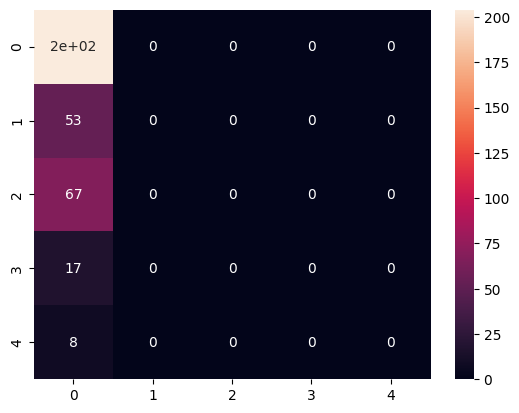

In [43]:
print_metrics(test_labels,ensemble_pred_val )